In [1]:
from matscidata import MatSciDataset
import numpy as np
from matplotlib import pyplot as plt
import os
from models.checkers import p2_fn
import h5py
import pickle as pkl

In [2]:
ds = MatSciDataset(data_path='./datasets/matsci/morph_global_64_valid_255.h5')

In [3]:
p2s = []

In [4]:
for idx, i in enumerate(ds):
    p2s.append(p2_fn(i.unsqueeze(0).cuda()))
    if idx == 5000:
        break

In [5]:
import torch
import seaborn as sns
sns.set()

In [6]:
gen = torch.load('model_out_p2_3//generator.pt', map_location='cpu')
gen.eval();

In [7]:
def generate_imgs(idx, p2s, gen):
    n = torch.randn((64,128))
    p2_curve = p2s[idx]
    p2_curve = p2_curve.expand((64,44))
    g=gen(n, p2_curve)
    g_img = g.reshape(64,1,64,64)
    return g_img

In [8]:
def get_plots(g_img, orig_p2):
    new_p2 = p2_fn(g_img.cuda()).cpu().detach().numpy()
    means = new_p2.mean(axis=0)
    stds = new_p2.std(axis=0)
    plt.plot(orig_p2, color='red', label='Target $p_2$')
    plt.plot(new_p2.mean(axis=0), color='blue', label='$p_2$(generated img)')
    plt.fill_between(np.arange(0,44), means-stds, means+stds, alpha=0.3)
    plt.legend()

In [9]:
for i in range(20):
    g_img = generate_imgs(i, p2s, gen)
    get_plots(g_img, p2s[i])

RuntimeError: Expected object of backend CPU but got backend CUDA for sequence element 1 in sequence argument at position #1 'tensors'

In [64]:
import seaborn as sns
import pandas as pd

In [65]:
diff_pd = pd.DataFrame(diffs_np)

In [66]:
mean = diff_pd.mean(axis=0)
std = diff_pd.std(axis=0)

Text(0, 0.5, '$p_{2_g} - p_{2_i}$')

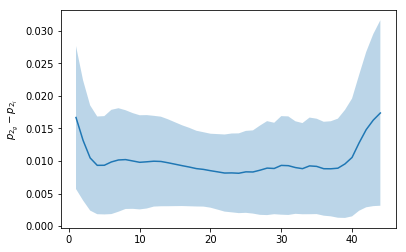

In [67]:
plt.plot(np.arange(1,45), mean)
plt.fill_between(np.arange(1,45), np.array(mean-std), np.array(mean+std), alpha=0.3)
plt.ylabel('$p_{2_g} - p_{2_i}$')

In [68]:
orig_p2s_np = [i[0,:] for i in orig_p2s]
norm_diffs = diffs_np/np.array(orig_p2s_np)

In [69]:
norm_mean = norm_diffs.mean(axis=0)
norm_std = norm_diffs.std(axis=0)

Text(0, 0.5, '$|p_{2_g} - p_{2_i}|/p_{2_g}$')

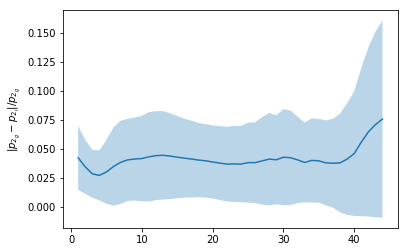

In [70]:
plt.plot(np.arange(1,45), norm_mean)
plt.fill_between(np.arange(1,45), np.array(norm_mean-norm_std), np.array(norm_mean+norm_std), alpha=0.3)
plt.ylabel('$|p_{2_g} - p_{2_i}|/p_{2_g}$')

In [71]:
import h5py

In [72]:
data = h5py.File('./datasets/matsci/morph_global_64_valid_255.h5','r')

In [73]:
imgs = data['morphology_64_64'][:60, 0, ...]

In [74]:
from matplotlib import pyplot as plt

In [75]:
os.makedirs('orig_imgs')

FileExistsError: [Errno 17] File exists: 'orig_imgs'

/data/work2/Phys-GAN/physgan/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


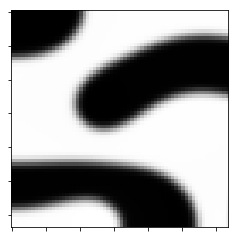

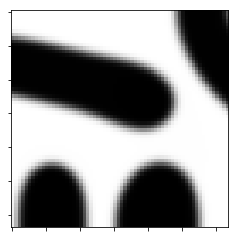

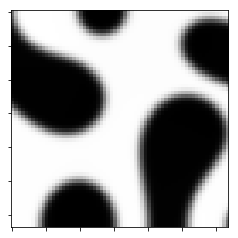

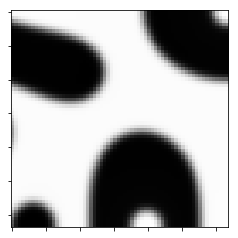

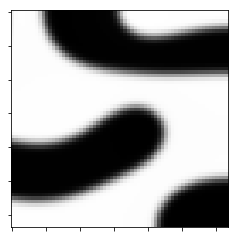

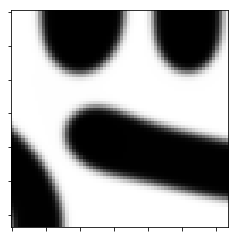

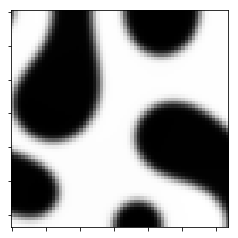

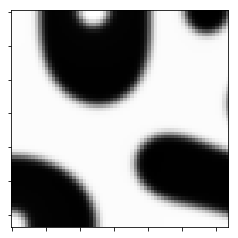

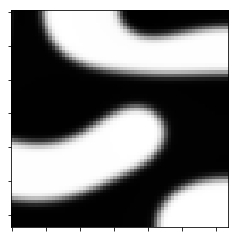

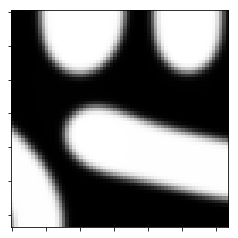

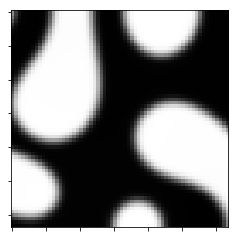

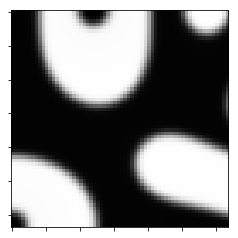

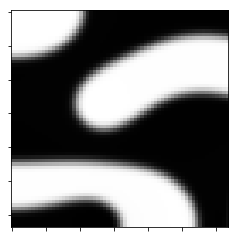

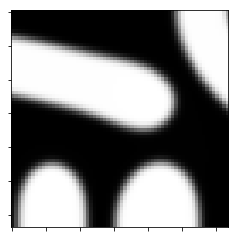

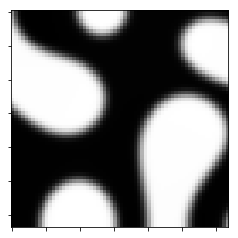

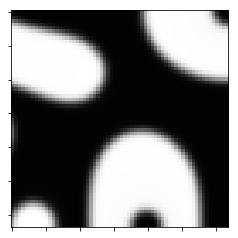

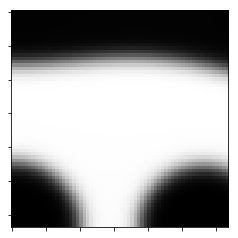

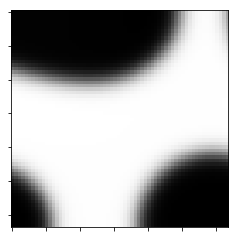

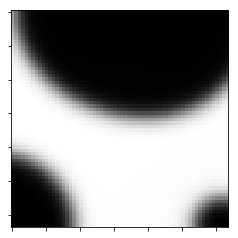

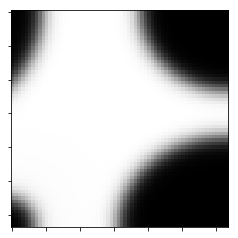

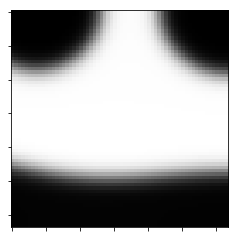

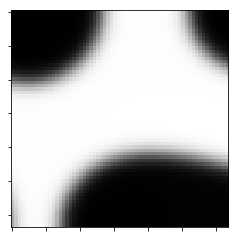

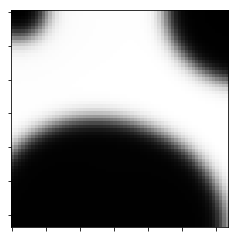

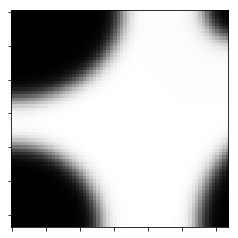

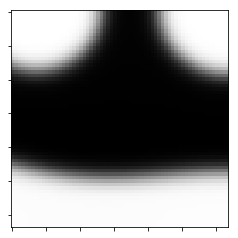

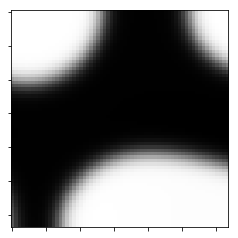

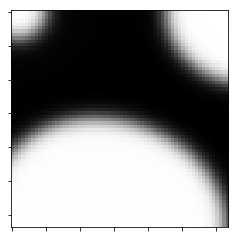

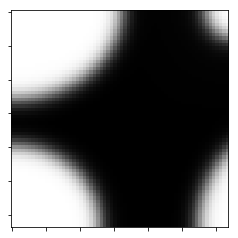

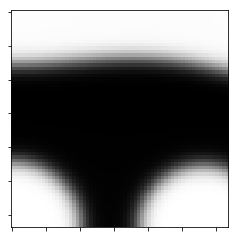

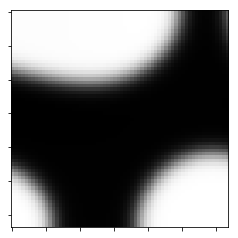

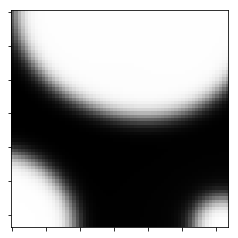

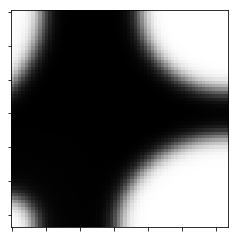

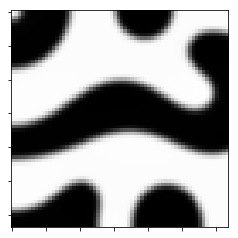

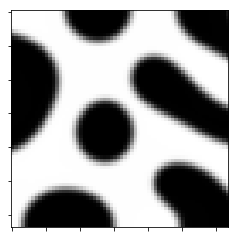

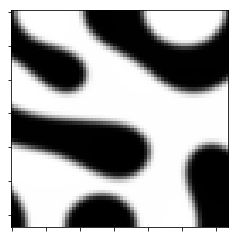

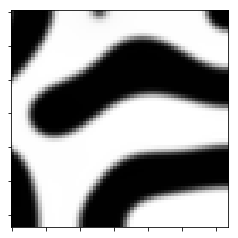

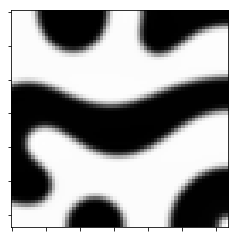

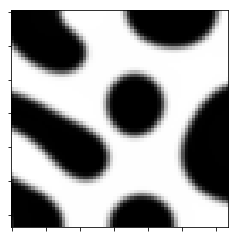

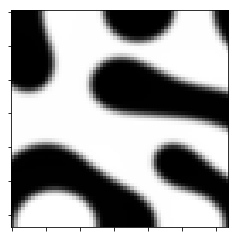

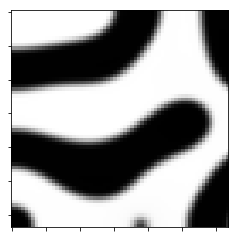

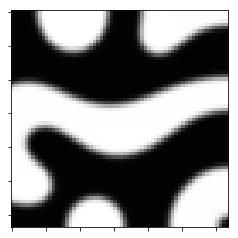

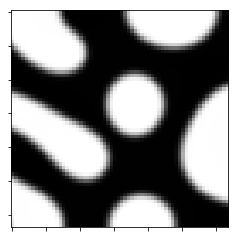

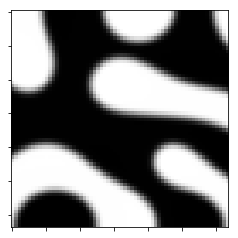

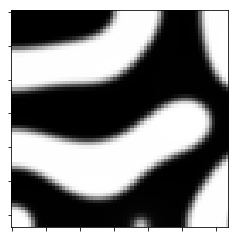

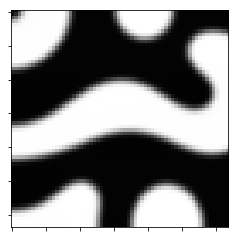

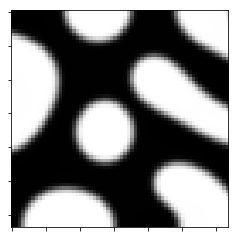

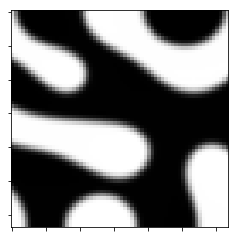

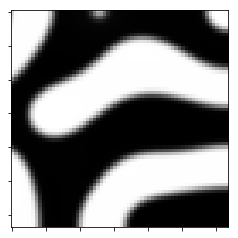

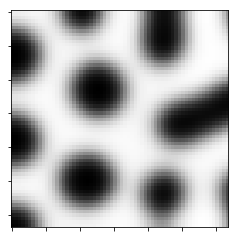

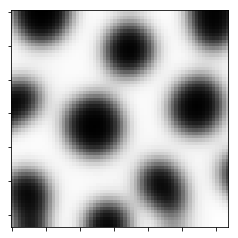

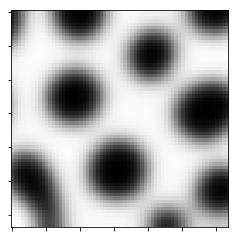

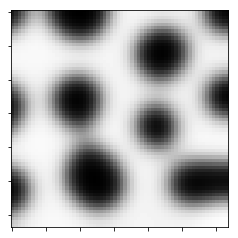

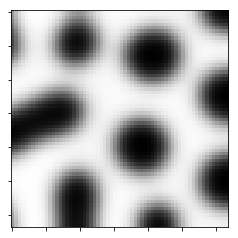

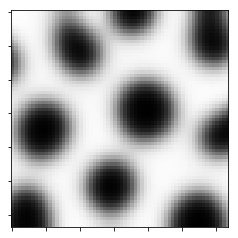

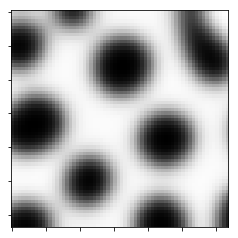

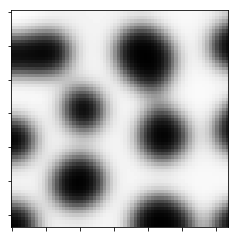

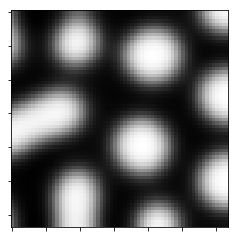

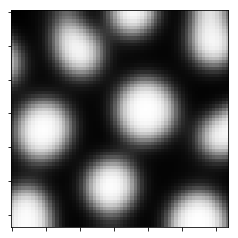

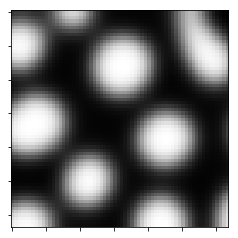

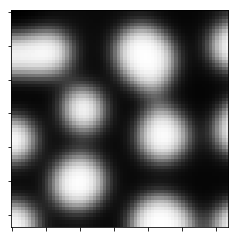

In [76]:
for idx, i in enumerate(range(60)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    tmp_img = imgs[i, ...]
    plt.imshow(tmp_img, cmap='gray')
    ax.tick_params(axis='both', labelleft=False, labelbottom=False)
    fig.savefig('orig_imgs/{}_{}.png'.format(idx, int(np.mean(tmp_img)*100.0/255.0)), bbox_inches='tight', pad_inches=0)